In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import sklearn
import scanpy as sc
import os

In [2]:
spatialLIBD_dir = 'data/spatialLIBD_data'

In [3]:
# spots = pd.read_csv(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_counts.csv'), header = 0, index_col = 0, sep =',')
# st = pd.read_csv(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_st.csv'))
# gene_meta = pd.read_csv(os.path.join(spatialLIBD_dir, 'gene_meta.csv'))
# cell_type = pd.read_csv(os.path.join(spatialLIBD_dir, 'RowDataTable1.csv'))
# csr = pd.read_csv(os.path.join(spatialLIBD_dir, 'spatialLIBD_csr_counts.csv'), index_col=0)

In [4]:
# spots.to_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_counts.pkl'))
# st.to_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_st.pkl'))
# gene_meta.to_pickle(os.path.join(spatialLIBD_dir, 'gene_meta.pkl'))
# cell_type.to_pickle(os.path.join(spatialLIBD_dir, 'RowDataTable1.pkl'))
# csr.to_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_csr_counts.pkl'))

In [5]:
spots = pd.read_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_counts.pkl'))
st = pd.read_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_st.pkl'))
gene_meta = pd.read_pickle(os.path.join(spatialLIBD_dir, 'gene_meta.pkl'))
cell_type = pd.read_pickle(os.path.join(spatialLIBD_dir, 'RowDataTable1.pkl'))
csr = pd.read_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_csr_counts.pkl'))

In [6]:
print('spots')
display(spots)
print('st')
display(st)
print('gene_meta')
display(gene_meta)
print('cell_type')
display(cell_type)
print('csr')
display(csr)

spots


,sample_id,Cluster,sum_umi,sum_gene,subject,position,replicate,subject_position,discard,key,...,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial,spatialLIBD,ManualAnnotation,in_tissue,array_row,array_col
AAACAACGAATAGTTC-1,151507,6,948,727,Br5292,0,1,Br5292_pos0,False,151507_AAACAACGAATAGTTC-1,...,1,1,1,1,1,L1,NaN,True,0,16
AAACAAGTATCTCCCA-1,151507,3,4261,2170,Br5292,0,1,Br5292_pos0,False,151507_AAACAAGTATCTCCCA-1,...,2,2,1,2,1,L3,NaN,True,50,102
AAACAATCTACTAGCA-1,151507,2,1969,1093,Br5292,0,1,Br5292_pos0,False,151507_AAACAATCTACTAGCA-1,...,2,1,4,1,6,L1,NaN,True,3,43
AAACACCAATAACTGC-1,151507,5,3368,1896,Br5292,0,1,Br5292_pos0,False,151507_AAACACCAATAACTGC-1,...,7,8,7,8,1,WM,NaN,True,59,19
AAACAGCTTTCAGAAG-1,151507,1,2981,1620,Br5292,0,1,Br5292_pos0,False,151507_AAACAGCTTTCAGAAG-1,...,8,2,8,1,1,L6,NaN,True,43,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1.11,151676,5,2880,1638,Br8100,300,2,Br8100_pos300,False,151676_TTGTTGTGTGTCAAGA-1,...,6,1,4,1,1,L6,NaN,True,31,77
TTGTTTCACATCCAGG-1.11,151676,2,2640,1526,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCACATCCAGG-1,...,5,5,5,8,1,WM,NaN,True,58,42
TTGTTTCATTAGTCTA-1.11,151676,2,2063,1279,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCATTAGTCTA-1,...,5,5,8,1,1,WM,NaN,True,60,30
TTGTTTCCATACAACT-1.11,151676,7,1031,748,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCCATACAACT-1,...,2,3,2,4,7,L6,NaN,True,45,27


st


,Unnamed: 0,pxl_col_in_fullres,pxl_row_in_fullres
0,AAACAACGAATAGTTC-1,3276,2514
1,AAACAAGTATCTCCCA-1,9178,8520
2,AAACAATCTACTAGCA-1,5133,2878
3,AAACACCAATAACTGC-1,3462,9581
4,AAACAGCTTTCAGAAG-1,2779,7663
...,...,...,...
47676,TTGTTGTGTGTCAAGA-1,7946,6378
47677,TTGTTTCACATCCAGG-1,5512,9594
47678,TTGTTTCATTAGTCTA-1,4684,9827
47679,TTGTTTCCATACAACT-1,4491,8029


gene_meta


,Unnamed: 0,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype,gene_search,is_top_hvg
0,ENSG00000243485,havana,gene,ENSG00000243485,5,MIR1302-2HG,havana,lincRNA,MIR1302-2HG; ENSG00000243485,False
1,ENSG00000237613,havana,gene,ENSG00000237613,2,FAM138A,havana,lincRNA,FAM138A; ENSG00000237613,False
2,ENSG00000186092,ensembl_havana,gene,ENSG00000186092,6,OR4F5,ensembl_havana,protein_coding,OR4F5; ENSG00000186092,False
3,ENSG00000238009,ensembl_havana,gene,ENSG00000238009,6,AL627309.1,ensembl_havana,lincRNA,AL627309.1; ENSG00000238009,False
4,ENSG00000239945,havana,gene,ENSG00000239945,1,AL627309.3,havana,lincRNA,AL627309.3; ENSG00000239945,False
...,...,...,...,...,...,...,...,...,...,...
33533,ENSG00000277856,ensembl,gene,ENSG00000277856,1,AC233755.2,ensembl,protein_coding,AC233755.2; ENSG00000277856,False
33534,ENSG00000275063,ensembl,gene,ENSG00000275063,1,AC233755.1,ensembl,protein_coding,AC233755.1; ENSG00000275063,False
33535,ENSG00000271254,ensembl,gene,ENSG00000271254,6,AC240274.1,ensembl,protein_coding,AC240274.1; ENSG00000271254,False
33536,ENSG00000277475,ensembl,gene,ENSG00000277475,1,AC213203.1,ensembl,protein_coding,AC213203.1; ENSG00000277475,False


cell_type


,Unnamed: 0,ID,gene_biotype,Symbol,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,...,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
0,MIR1302-2HG,ENSG00000243485,lincRNA,MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,...,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
1,FAM138A,ENSG00000237613,lincRNA,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
2,OR4F5,ENSG00000186092,protein_coding,OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
3,AL627309.1,ENSG00000238009,lincRNA,AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,...,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.0,0.04473,0.031469,0.000000
4,AL627309.3,ENSG00000239945,lincRNA,AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,AC233755.2,ENSG00000277856,protein_coding,AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33534,AC233755.1,ENSG00000275063,protein_coding,AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33535,AC240274.1,ENSG00000271254,protein_coding,AC240274.1,0.066149,0.051151,0.086957,0.082794,0.131679,0.045455,...,0.115068,0.181598,0.000000,0.125,0.0,0.033505,0.0,0.03758,0.064685,0.111111
33536,AC213203.1,ENSG00000277475,protein_coding,AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000


csr


,gene,spot,count
1,ENSG00000187608,AAACAACGAATAGTTC-1,1
2,ENSG00000132906,AAACAACGAATAGTTC-1,1
3,ENSG00000116786,AAACAACGAATAGTTC-1,1
4,ENSG00000162545,AAACAACGAATAGTTC-1,1
5,ENSG00000142669,AAACAACGAATAGTTC-1,2
...,...,...,...
82659003,ENSG00000212907,TTGTTTGTGTAAATTC-1,2
82659004,ENSG00000198886,TTGTTTGTGTAAATTC-1,72
82659005,ENSG00000198786,TTGTTTGTGTAAATTC-1,7
82659006,ENSG00000198695,TTGTTTGTGTAAATTC-1,1


In [7]:
# rename st column names
st.columns = ["spot", "X", "Y"]
st.head()

,spot,X,Y
0,AAACAACGAATAGTTC-1,3276,2514
1,AAACAAGTATCTCCCA-1,9178,8520
2,AAACAATCTACTAGCA-1,5133,2878
3,AAACACCAATAACTGC-1,3462,9581
4,AAACAGCTTTCAGAAG-1,2779,7663


In [8]:
spot = spots[['sample_id', 'key', 'subject', 'replicate', 'Cluster', 'sum_umi', 'sum_gene', 'cell_count', 'in_tissue','spatialLIBD', 'array_col', 'array_row']]
spot

,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
AAACAACGAATAGTTC-1,151507,151507_AAACAACGAATAGTTC-1,Br5292,1,6,948,727,0,True,L1,16,0
AAACAAGTATCTCCCA-1,151507,151507_AAACAAGTATCTCCCA-1,Br5292,1,3,4261,2170,3,True,L3,102,50
AAACAATCTACTAGCA-1,151507,151507_AAACAATCTACTAGCA-1,Br5292,1,2,1969,1093,2,True,L1,43,3
AAACACCAATAACTGC-1,151507,151507_AAACACCAATAACTGC-1,Br5292,1,5,3368,1896,5,True,WM,19,59
AAACAGCTTTCAGAAG-1,151507,151507_AAACAGCTTTCAGAAG-1,Br5292,1,1,2981,1620,3,True,L6,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1.11,151676,151676_TTGTTGTGTGTCAAGA-1,Br8100,2,5,2880,1638,1,True,L6,77,31
TTGTTTCACATCCAGG-1.11,151676,151676_TTGTTTCACATCCAGG-1,Br8100,2,2,2640,1526,6,True,WM,42,58
TTGTTTCATTAGTCTA-1.11,151676,151676_TTGTTTCATTAGTCTA-1,Br8100,2,2,2063,1279,9,True,WM,30,60
TTGTTTCCATACAACT-1.11,151676,151676_TTGTTTCCATACAACT-1,Br8100,2,7,1031,748,2,True,L6,27,45


In [9]:
# merge spot and st info -- merging based on index... no other specifying info in st:S, seems okay?
spot_meta = st.join(spot.reset_index())
spot_meta


,spot,X,Y,index,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
0,AAACAACGAATAGTTC-1,3276,2514,AAACAACGAATAGTTC-1,151507,151507_AAACAACGAATAGTTC-1,Br5292,1,6,948,727,0,True,L1,16,0
1,AAACAAGTATCTCCCA-1,9178,8520,AAACAAGTATCTCCCA-1,151507,151507_AAACAAGTATCTCCCA-1,Br5292,1,3,4261,2170,3,True,L3,102,50
2,AAACAATCTACTAGCA-1,5133,2878,AAACAATCTACTAGCA-1,151507,151507_AAACAATCTACTAGCA-1,Br5292,1,2,1969,1093,2,True,L1,43,3
3,AAACACCAATAACTGC-1,3462,9581,AAACACCAATAACTGC-1,151507,151507_AAACACCAATAACTGC-1,Br5292,1,5,3368,1896,5,True,WM,19,59
4,AAACAGCTTTCAGAAG-1,2779,7663,AAACAGCTTTCAGAAG-1,151507,151507_AAACAGCTTTCAGAAG-1,Br5292,1,1,2981,1620,3,True,L6,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47676,TTGTTGTGTGTCAAGA-1,7946,6378,TTGTTGTGTGTCAAGA-1.11,151676,151676_TTGTTGTGTGTCAAGA-1,Br8100,2,5,2880,1638,1,True,L6,77,31
47677,TTGTTTCACATCCAGG-1,5512,9594,TTGTTTCACATCCAGG-1.11,151676,151676_TTGTTTCACATCCAGG-1,Br8100,2,2,2640,1526,6,True,WM,42,58
47678,TTGTTTCATTAGTCTA-1,4684,9827,TTGTTTCATTAGTCTA-1.11,151676,151676_TTGTTTCATTAGTCTA-1,Br8100,2,2,2063,1279,9,True,WM,30,60
47679,TTGTTTCCATACAACT-1,4491,8029,TTGTTTCCATACAACT-1.11,151676,151676_TTGTTTCCATACAACT-1,Br8100,2,7,1031,748,2,True,L6,27,45


In [10]:
assert((spot_meta.spot.isin(spot_meta['index'])).all())

In [11]:
def plot_cell_layers(df):
    
    layer_idx = df["spatialLIBD"].unique()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 12, figsize = (50,6))
    samples = df["sample_id"].unique()
    
    for idx, sample in enumerate(samples):
        cells_of_samples = df[df["sample_id"] == sample]
        for index in layer_idx:
            cells_of_layer = cells_of_samples[cells_of_samples["spatialLIBD"] == index]
            ax[idx].scatter(-cells_of_layer["Y"], cells_of_layer["X"], label = index)
        ax[idx].set_title(sample)
    plt.legend()
    plt.show()

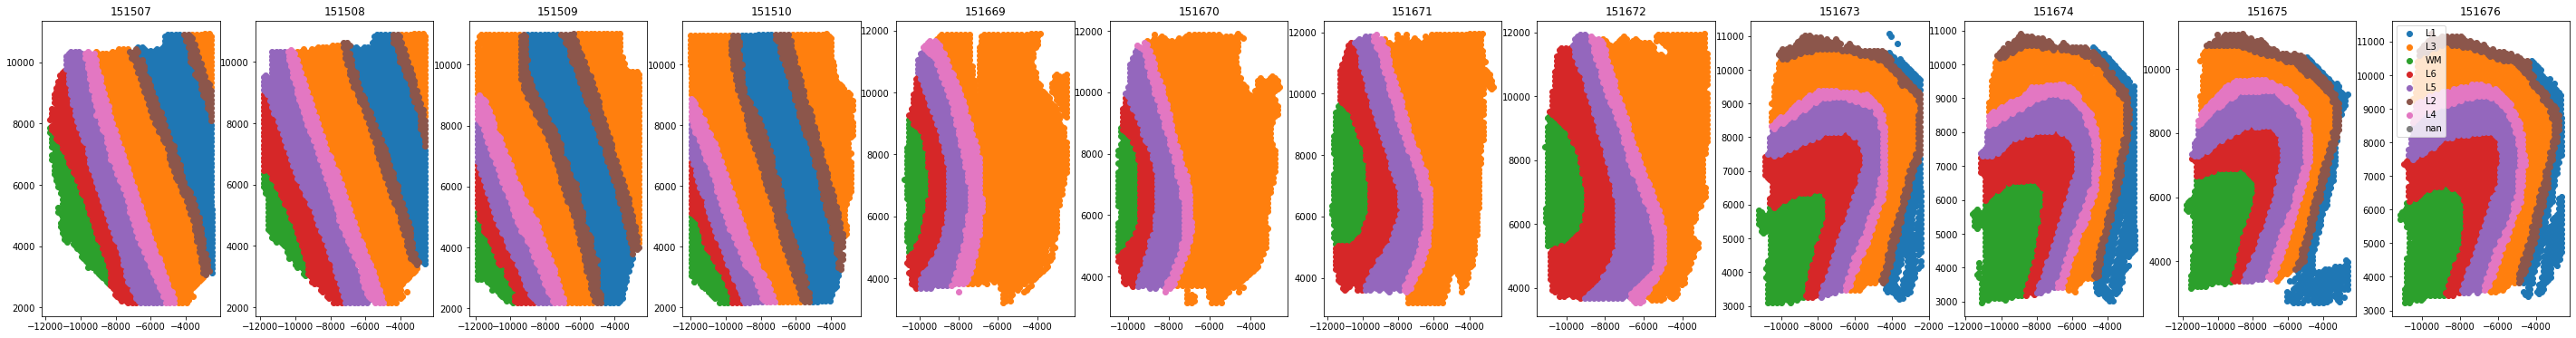

In [12]:
plot_cell_layers(spot_meta) 

In [13]:
cell_type

,Unnamed: 0,ID,gene_biotype,Symbol,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,...,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
0,MIR1302-2HG,ENSG00000243485,lincRNA,MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,...,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
1,FAM138A,ENSG00000237613,lincRNA,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
2,OR4F5,ENSG00000186092,protein_coding,OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
3,AL627309.1,ENSG00000238009,lincRNA,AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,...,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.0,0.04473,0.031469,0.000000
4,AL627309.3,ENSG00000239945,lincRNA,AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,AC233755.2,ENSG00000277856,protein_coding,AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33534,AC233755.1,ENSG00000275063,protein_coding,AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33535,AC240274.1,ENSG00000271254,protein_coding,AC240274.1,0.066149,0.051151,0.086957,0.082794,0.131679,0.045455,...,0.115068,0.181598,0.000000,0.125,0.0,0.033505,0.0,0.03758,0.064685,0.111111
33536,AC213203.1,ENSG00000277475,protein_coding,AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000


In [15]:
cell_type = cell_type.set_index("Symbol")

In [18]:
cell_type_idx_df = cell_type.iloc[:,:3]

In [19]:
cell_type = cell_type.drop(['Unnamed: 0', 'gene_biotype', "ID"], axis=1)

In [20]:
csr[['spot']].nunique()

spot    4941
dtype: int64

In [21]:
wide = csr.pivot_table(index = "spot", columns = "gene", values = "count")
wide = wide.fillna(0)


In [22]:
counts_df = wide

In [24]:
counts_df

gene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285444,ENSG00000285447,ENSG00000285454,ENSG00000285458,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285486,ENSG00000285492,ENSG00000285509
spot,,,,,,,,,,,,,,,,,,,,,
AAACAACGAATAGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAAGTATCTCCCA-1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,1.0,0.0,1.8,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
ID_to_symbol_d = cell_type_idx_df.ID.reset_index().set_index('ID')['Symbol'].to_dict()

In [36]:
counts_df.columns = counts_df.columns.map(ID_to_symbol_d, na_action=None)
counts_df

gene,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL162377.3,ZNF883,AC111006.1,AC093827.5,AL691520.1,AC139491.7,AC021097.2,AC003043.2,AL356417.3,AP000646.1
spot,,,,,,,,,,,,,,,,,,,,,
AAACAACGAATAGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAAGTATCTCCCA-1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,1.0,0.0,1.8,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# working with sampleID 151673 only, for now
dlpfc = spot_meta[spot_meta['sample_id'] == 151673]
dlpfc

,spot,X,Y,index,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
33317,AAACAAGTATCTCCCA-1,9791,8468,AAACAAGTATCTCCCA-1.8,151673,151673_AAACAAGTATCTCCCA-1,Br8100,1,7,8458,3586,6,True,L3,102,50
33318,AAACAATCTACTAGCA-1,5769,2807,AAACAATCTACTAGCA-1.3,151673,151673_AAACAATCTACTAGCA-1,Br8100,1,4,1667,1150,16,True,L1,43,3
33319,AAACACCAATAACTGC-1,4068,9505,AAACACCAATAACTGC-1.8,151673,151673_AAACACCAATAACTGC-1,Br8100,1,8,3769,1960,5,True,WM,19,59
33320,AAACAGAGCGACTCCT-1,9271,4151,AAACAGAGCGACTCCT-1.7,151673,151673_AAACAGAGCGACTCCT-1,Br8100,1,6,5433,2424,2,True,L3,94,14
33321,AAACAGCTTTCAGAAG-1,3393,7583,AAACAGCTTTCAGAAG-1.7,151673,151673_AAACAGCTTTCAGAAG-1,Br8100,1,3,4278,2264,4,True,L5,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36951,TTGTTTCACATCCAGG-1,5653,9396,TTGTTTCACATCCAGG-1.8,151673,151673_TTGTTTCACATCCAGG-1,Br8100,1,8,4324,2170,3,True,WM,42,58
36952,TTGTTTCATTAGTCTA-1,4825,9630,TTGTTTCATTAGTCTA-1.8,151673,151673_TTGTTTCATTAGTCTA-1,Br8100,1,8,2761,1560,4,True,WM,30,60
36953,TTGTTTCCATACAACT-1,4631,7831,TTGTTTCCATACAACT-1.8,151673,151673_TTGTTTCCATACAACT-1,Br8100,1,6,2322,1343,3,True,L6,27,45
36954,TTGTTTGTATTACACG-1,5571,11193,TTGTTTGTATTACACG-1.4,151673,151673_TTGTTTGTATTACACG-1,Br8100,1,6,2331,1420,16,True,WM,41,73


In [38]:
dlpfc = dlpfc.set_index('spot')

In [39]:
dlpfc

,X,Y,index,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
spot,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,9791,8468,AAACAAGTATCTCCCA-1.8,151673,151673_AAACAAGTATCTCCCA-1,Br8100,1,7,8458,3586,6,True,L3,102,50
AAACAATCTACTAGCA-1,5769,2807,AAACAATCTACTAGCA-1.3,151673,151673_AAACAATCTACTAGCA-1,Br8100,1,4,1667,1150,16,True,L1,43,3
AAACACCAATAACTGC-1,4068,9505,AAACACCAATAACTGC-1.8,151673,151673_AAACACCAATAACTGC-1,Br8100,1,8,3769,1960,5,True,WM,19,59
AAACAGAGCGACTCCT-1,9271,4151,AAACAGAGCGACTCCT-1.7,151673,151673_AAACAGAGCGACTCCT-1,Br8100,1,6,5433,2424,2,True,L3,94,14
AAACAGCTTTCAGAAG-1,3393,7583,AAACAGCTTTCAGAAG-1.7,151673,151673_AAACAGCTTTCAGAAG-1,Br8100,1,3,4278,2264,4,True,L5,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,5653,9396,TTGTTTCACATCCAGG-1.8,151673,151673_TTGTTTCACATCCAGG-1,Br8100,1,8,4324,2170,3,True,WM,42,58
TTGTTTCATTAGTCTA-1,4825,9630,TTGTTTCATTAGTCTA-1.8,151673,151673_TTGTTTCATTAGTCTA-1,Br8100,1,8,2761,1560,4,True,WM,30,60
TTGTTTCCATACAACT-1,4631,7831,TTGTTTCCATACAACT-1.8,151673,151673_TTGTTTCCATACAACT-1,Br8100,1,6,2322,1343,3,True,L6,27,45


In [40]:
temp = pd.concat([dlpfc, counts_df], join='inner', axis=1)
temp

,X,Y,index,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,...,AL162377.3,ZNF883,AC111006.1,AC093827.5,AL691520.1,AC139491.7,AC021097.2,AC003043.2,AL356417.3,AP000646.1
spot,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,9791,8468,AAACAAGTATCTCCCA-1.8,151673,151673_AAACAAGTATCTCCCA-1,Br8100,1,7,8458,3586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,5769,2807,AAACAATCTACTAGCA-1.3,151673,151673_AAACAATCTACTAGCA-1,Br8100,1,4,1667,1150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,4068,9505,AAACACCAATAACTGC-1.8,151673,151673_AAACACCAATAACTGC-1,Br8100,1,8,3769,1960,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,9271,4151,AAACAGAGCGACTCCT-1.7,151673,151673_AAACAGAGCGACTCCT-1,Br8100,1,6,5433,2424,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,3393,7583,AAACAGCTTTCAGAAG-1.7,151673,151673_AAACAGCTTTCAGAAG-1,Br8100,1,3,4278,2264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,5653,9396,TTGTTTCACATCCAGG-1.8,151673,151673_TTGTTTCACATCCAGG-1,Br8100,1,8,4324,2170,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,4825,9630,TTGTTTCATTAGTCTA-1.8,151673,151673_TTGTTTCATTAGTCTA-1,Br8100,1,8,2761,1560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,4631,7831,TTGTTTCCATACAACT-1.8,151673,151673_TTGTTTCCATACAACT-1,Br8100,1,6,2322,1343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
temp = temp.iloc[:,15:]
temp

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL162377.3,ZNF883,AC111006.1,AC093827.5,AL691520.1,AC139491.7,AC021097.2,AC003043.2,AL356417.3,AP000646.1
spot,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,1.0,0.0,1.8,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
cell_type

,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,propExprsIn.Excit_E,propExprsIn.Excit_F,propExprsIn.Inhib_A,propExprsIn.Inhib_B,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
Symbol,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,0.320856,0.288066,0.111111,0.134361,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.0,0.04473,0.031469,0.000000
AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
AC240274.1,0.066149,0.051151,0.086957,0.082794,0.131679,0.045455,0.139037,0.135802,0.099099,0.110132,0.115068,0.181598,0.000000,0.125,0.0,0.033505,0.0,0.03758,0.064685,0.111111


In [43]:
same_genes = cell_type[cell_type.index.isin(temp.columns)]
same_genes

,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,propExprsIn.Excit_E,propExprsIn.Excit_F,propExprsIn.Inhib_A,propExprsIn.Inhib_B,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
Symbol,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,0.320856,0.288066,0.111111,0.134361,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.000000,0.044730,0.031469,0.000000
AL669831.2,0.000446,0.000000,0.000000,0.000000,0.000000,0.007576,0.000000,0.000000,0.000000,0.002203,0.002740,0.002421,0.000000,0.000,0.0,0.000000,0.000000,0.000183,0.000000,0.000000
AL669831.5,0.336011,0.116368,0.799622,0.667529,0.830153,0.840909,0.828877,0.757202,0.450450,0.491189,0.545205,0.554479,0.285714,0.750,0.0,0.139175,0.166667,0.155454,0.234266,0.111111
FAM87B,0.001250,0.001279,0.000000,0.003881,0.001908,0.000000,0.000000,0.004115,0.003003,0.002203,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000550,0.003497,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.4,0.023567,0.019182,0.056711,0.063389,0.076336,0.113636,0.080214,0.032922,0.048048,0.028634,0.021918,0.031477,0.000000,0.125,0.0,0.002577,0.000000,0.005316,0.019231,0.000000
AC007325.2,0.010712,0.121483,0.001890,0.002587,0.003817,0.007576,0.000000,0.012346,0.000000,0.000000,0.005479,0.002421,0.000000,0.000,0.0,0.002577,0.000000,0.001283,0.008741,0.000000
AL354822.1,0.041064,0.033248,0.083176,0.090556,0.097328,0.045455,0.053476,0.049383,0.036036,0.046256,0.032877,0.021792,0.000000,0.000,0.0,0.033505,0.000000,0.027681,0.040210,0.000000


In [44]:
counts_df.to_pickle(os.path.join(spatialLIBD_dir, 'counts_df.pkl'))

In [45]:
dlpfc

,X,Y,index,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
spot,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,9791,8468,AAACAAGTATCTCCCA-1.8,151673,151673_AAACAAGTATCTCCCA-1,Br8100,1,7,8458,3586,6,True,L3,102,50
AAACAATCTACTAGCA-1,5769,2807,AAACAATCTACTAGCA-1.3,151673,151673_AAACAATCTACTAGCA-1,Br8100,1,4,1667,1150,16,True,L1,43,3
AAACACCAATAACTGC-1,4068,9505,AAACACCAATAACTGC-1.8,151673,151673_AAACACCAATAACTGC-1,Br8100,1,8,3769,1960,5,True,WM,19,59
AAACAGAGCGACTCCT-1,9271,4151,AAACAGAGCGACTCCT-1.7,151673,151673_AAACAGAGCGACTCCT-1,Br8100,1,6,5433,2424,2,True,L3,94,14
AAACAGCTTTCAGAAG-1,3393,7583,AAACAGCTTTCAGAAG-1.7,151673,151673_AAACAGCTTTCAGAAG-1,Br8100,1,3,4278,2264,4,True,L5,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,5653,9396,TTGTTTCACATCCAGG-1.8,151673,151673_TTGTTTCACATCCAGG-1,Br8100,1,8,4324,2170,3,True,WM,42,58
TTGTTTCATTAGTCTA-1,4825,9630,TTGTTTCATTAGTCTA-1.8,151673,151673_TTGTTTCATTAGTCTA-1,Br8100,1,8,2761,1560,4,True,WM,30,60
TTGTTTCCATACAACT-1,4631,7831,TTGTTTCCATACAACT-1.8,151673,151673_TTGTTTCCATACAACT-1,Br8100,1,6,2322,1343,3,True,L6,27,45


In [46]:
dlpfc.to_pickle(os.path.join(spatialLIBD_dir, 'dlpfc.pkl'))

In [47]:
temp.to_pickle(os.path.join(spatialLIBD_dir, 'temp.pkl'))